# WDC Progression

In [78]:
import pandas as pd
import sqlite3


con = sqlite3.connect("../data/f1data.sqlite")

In [79]:
query = """
SELECT
  r.date,
  r.round,
  d.code,
  d.forename || ' ' || d.surname AS name,
  ds.position,
  ds.points
FROM driver_standings AS ds
JOIN races r on ds.raceId = r.raceId
JOIN drivers d on ds.driverId = d.driverId
WHERE r.year = 2022
"""

df = pd.read_sql(
  query,
  con,
  index_col="date",
  parse_dates="date"
)

## Top 3 Drivers

<AxesSubplot:xlabel='date'>

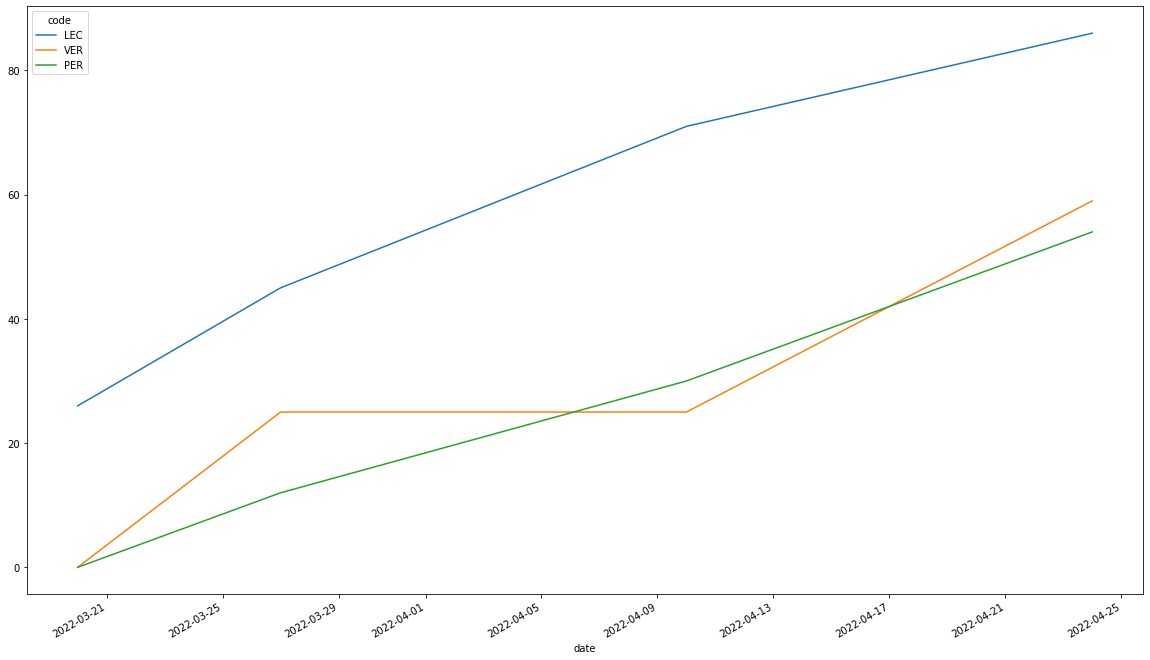

In [80]:
top_3 = df[df.index == df.index.max()].nlargest(3, columns="points")["code"]
df.pivot(index=None, columns="code", values="points").plot(
  y=top_3,
  figsize=(20,12),
)

## Top 7 Drivers

<AxesSubplot:xlabel='date'>

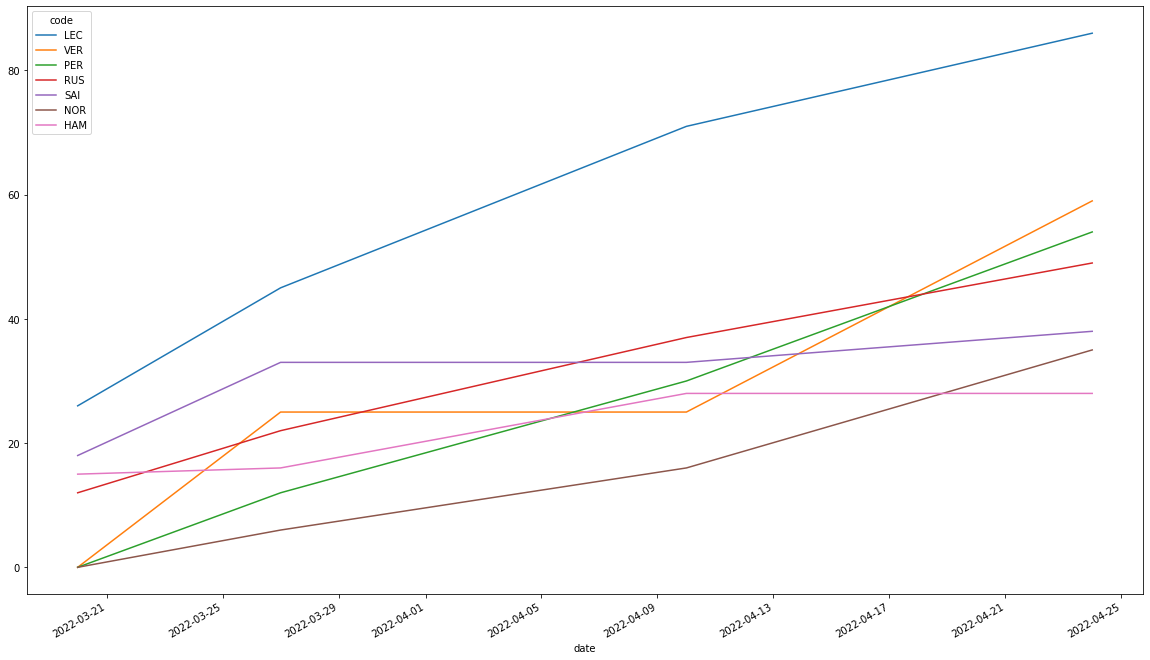

In [81]:
top_7 = df[df.index == df.index.max()].nlargest(7, columns="points")["code"]
df.pivot(index=None, columns="code", values="points").plot(
  y=top_7,
  figsize=(20,12),
)